<a href="https://colab.research.google.com/github/noyon57/DiabetiesNewDATaset/blob/main/DiabetesNEwFullWork(!).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Dataset of Diabetes .csv") 

In [ ]:


df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
df['CLASS'].value_counts()


Y     844
N     102
P      53
N       1
Name: CLASS, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [ ]:
df['CLASS'] = df['CLASS'].str.replace("N ","N")

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

# **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.CLASS= le.fit_transform(df.CLASS.values)
df.Gender= le.fit_transform(df.Gender.values)

In [ ]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [ ]:
df.describe()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


Visualizing aspects of the **dataset**

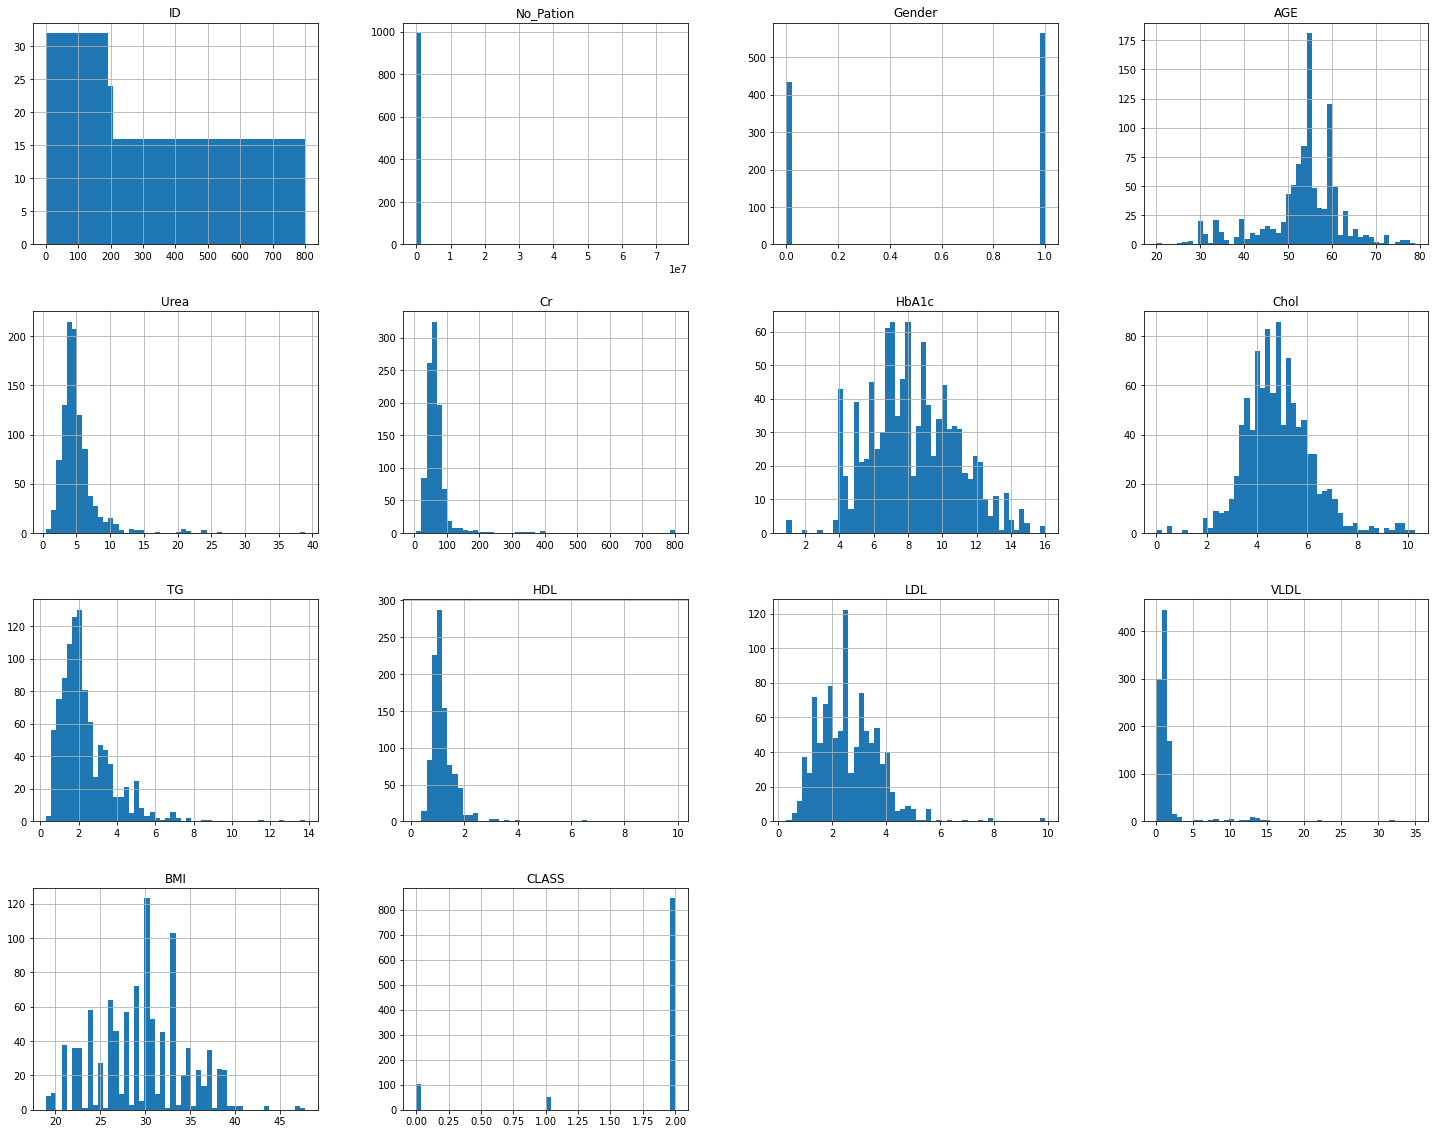

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

Removing duplicated data points



```

**bold text**

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

**Creating a test set**

In [ ]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

Gaining further insight
**bold text**

In [ ]:
correlation_matrix = train_df.corr(method='pearson')

correlation_matrix

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,1.000000,0.074894,0.022334,-0.039973,-0.103011,-0.105101,-0.012057,0.045535,-0.039806,0.006023,-0.060311,0.141810,0.052925,-0.050351
No_Pation,0.074894,1.000000,0.056723,-0.100541,-0.021819,-0.000189,-0.036950,-0.035013,-0.049344,-0.014143,-0.005933,0.116624,0.018721,-0.056527
Gender,0.022334,0.056723,1.000000,0.017998,0.119282,0.154415,0.010821,-0.054212,0.043506,-0.139382,0.075105,0.198284,0.064871,0.102765
AGE,-0.039973,-0.100541,0.017998,1.000000,0.084166,0.046559,0.372878,0.054532,0.143096,-0.032110,0.047218,-0.074614,0.366784,0.429306
Urea,-0.103011,-0.021819,0.119282,0.084166,1.000000,0.603897,-0.031959,0.003000,0.031683,-0.026642,-0.016728,-0.010977,0.028056,0.046153
Cr,-0.105101,-0.000189,0.154415,0.046559,0.603897,1.000000,-0.040043,-0.009631,0.041652,-0.011213,0.035605,0.001886,0.050620,0.022285
HbA1c,-0.012057,-0.036950,0.010821,0.372878,-0.031959,-0.040043,1.000000,0.179115,0.222555,0.007249,0.039862,0.076804,0.395928,0.547789
Chol,0.045535,-0.035013,-0.054212,0.054532,0.003000,-0.009631,0.179115,1.000000,0.325063,0.089523,0.425730,0.064395,-0.006458,0.174279
TG,-0.039806,-0.049344,0.043506,0.143096,0.031683,0.041652,0.222555,0.325063,1.000000,-0.088089,0.021320,0.144097,0.128009,0.197575
HDL,0.006023,-0.014143,-0.139382,-0.032110,-0.026642,-0.011213,0.007249,0.089523,-0.088089,1.000000,-0.126206,-0.061246,0.059461,-0.014917


In [ ]:
correlation_matrix["CLASS"].sort_values()


No_Pation   -0.056527
ID          -0.050351
HDL         -0.014917
LDL          0.019149
Cr           0.022285
Urea         0.046153
Gender       0.102765
VLDL         0.104735
Chol         0.174279
TG           0.197575
AGE          0.429306
HbA1c        0.547789
BMI          0.555932
CLASS        1.000000
Name: CLASS, dtype: float64

Handling missing data

In [ ]:
names = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)

In [ ]:
train_df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
161,474,67036,1.0,31,3.40,55,6.5,4.9,1.6,1.0,3.2,0.7,24.0,2
528,493,34419,NaN,51,4.10,78,7.2,7.2,5.3,1.0,3.8,2.4,38.0,2
201,168,34228,NaN,44,6.80,64,4.0,6.2,2.3,1.2,4.1,1.0,23.0,2
511,638,744467,1.0,55,3.66,61,9.9,5.3,3.3,0.9,3.1,22.7,30.1,2
665,562,574,1.0,59,5.20,56,10.9,4.9,2.1,1.1,2.5,0.9,28.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 117.2 KB


In [ ]:
id_median = train_df["ID"].median()
no_pation_median = train_df["No_Pation"].median()
gender_median = train_df["Gender"].median()
age_median = train_df["AGE"].median()
urea_median = train_df["Urea"].median()
cr_median = train_df["Cr"].median()
hba1c_median = train_df['HbA1c'].median()
chol_median = train_df['Chol'].median()
tg_median = train_df['TG'].median()
hdl_median = train_df['HDL'].median()
ldl_median = train_df['LDL'].median()
vldl_median = train_df['VLDL'].median()
bmi_median = train_df['BMI'].median()

train_df["ID"].fillna(id_median, inplace=True)
train_df["No_Pation"].fillna(no_pation_median, inplace=True)
train_df["Gender"].fillna(gender_median, inplace=True)
train_df["AGE"].fillna(age_median, inplace=True)
train_df["Urea"].fillna(urea_median, inplace=True)
train_df["Cr"].fillna(cr_median, inplace=True)
train_df["HbA1c"].fillna(hba1c_median, inplace=True)
train_df["Chol"].fillna(chol_median, inplace=True)
train_df["TG"].fillna(tg_median, inplace=True)
train_df["HDL"].fillna(hdl_median, inplace=True)
train_df["LDL"].fillna(ldl_median, inplace=True)
train_df["VLDL"].fillna(vldl_median, inplace=True)
train_df["BMI"].fillna(bmi_median, inplace=True)

In [ ]:
train_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
161,474,67036,1.0,31,3.40,55,6.5,4.9,1.6,1.0,3.2,0.7,24.0,2
528,493,34419,1.0,51,4.10,78,7.2,7.2,5.3,1.0,3.8,2.4,38.0,2
201,168,34228,1.0,44,6.80,64,4.0,6.2,2.3,1.2,4.1,1.0,23.0,2
511,638,744467,1.0,55,3.66,61,9.9,5.3,3.3,0.9,3.1,22.7,30.1,2
665,562,574,1.0,59,5.20,56,10.9,4.9,2.1,1.1,2.5,0.9,28.0,2


**Encoding categorial attributes**

In [ ]:
# Copy original dataframe and add new column with random fitness values
temp_df = train_df.copy()
fitness_values = ["bad", "moderate", "good", "very good",]
temp_df['fitness'] = np.random.choice(fitness_values, temp_df.shape[0])

temp_df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,fitness
161,474,67036,1.0,31,3.40,55,6.5,4.9,1.6,1.0,3.2,0.7,24.0,2,good
528,493,34419,1.0,51,4.10,78,7.2,7.2,5.3,1.0,3.8,2.4,38.0,2,very good
201,168,34228,1.0,44,6.80,64,4.0,6.2,2.3,1.2,4.1,1.0,23.0,2,very good
511,638,744467,1.0,55,3.66,61,9.9,5.3,3.3,0.9,3.1,22.7,30.1,2,good
665,562,574,1.0,59,5.20,56,10.9,4.9,2.1,1.1,2.5,0.9,28.0,2,good


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fitness_encoded = encoder.fit_transform(temp_df["fitness"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness values for first 10 entries: {fitness_encoded[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness values for first 10 entries: [1 3 3 1 1 2 1 3 1 2]


**Rescaling or standardizing attributes**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.627034,0.000237,0.0,0.508475,0.109375,0.033333,0.264901,0.377551,0.024793,0.210526,0.114583,0.008621,0.173913,0.0
4,0.629537,0.000452,0.0,0.220339,0.171875,0.033333,0.264901,0.448980,0.033058,0.042105,0.177083,0.005747,0.069565,0.0
7,0.525657,0.000452,0.0,0.474576,0.109375,0.034615,0.205298,0.244898,0.016529,0.052632,0.135417,0.005747,0.173913,0.0
8,0.837297,0.000452,0.0,0.389831,0.054688,0.060256,0.205298,0.336735,0.024793,0.210526,0.354167,0.022989,0.069565,0.0
9,0.948686,0.000452,0.0,0.203390,0.080729,0.010256,0.205298,0.336735,0.115702,0.210526,0.364583,0.022989,0.173913,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributes
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.627034,0.000237,0.0,0.508475,0.109375,0.033333,0.264901,0.377551,0.024793,0.210526,0.114583,0.008621,0.173913,0.0
4,0.629537,0.000452,0.0,0.220339,0.171875,0.033333,0.264901,0.448980,0.033058,0.042105,0.177083,0.005747,0.069565,0.0
7,0.525657,0.000452,0.0,0.474576,0.109375,0.034615,0.205298,0.244898,0.016529,0.052632,0.135417,0.005747,0.173913,0.0
8,0.837297,0.000452,0.0,0.389831,0.054688,0.060256,0.205298,0.336735,0.024793,0.210526,0.354167,0.022989,0.069565,0.0
9,0.948686,0.000452,0.0,0.203390,0.080729,0.010256,0.205298,0.336735,0.115702,0.210526,0.364583,0.022989,0.173913,0.0


In [ ]:
df['CLASS'].value_counts()

2    844
0    103
1     53
Name: CLASS, dtype: int64

In [ ]:
df.groupby('CLASS').mean()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
CLASS,,,,,,,,,,,,,
0,368.252427,815851.990291,0.378641,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
1,396.056604,64299.037736,0.679245,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
2,333.624408,216955.928910,0.580569,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517


In [ ]:
X = df.drop( 'CLASS', axis=1)


In [ ]:
print(X)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  
0    24.0  
1    23.0  
2  

In [ ]:
y = df['CLASS']

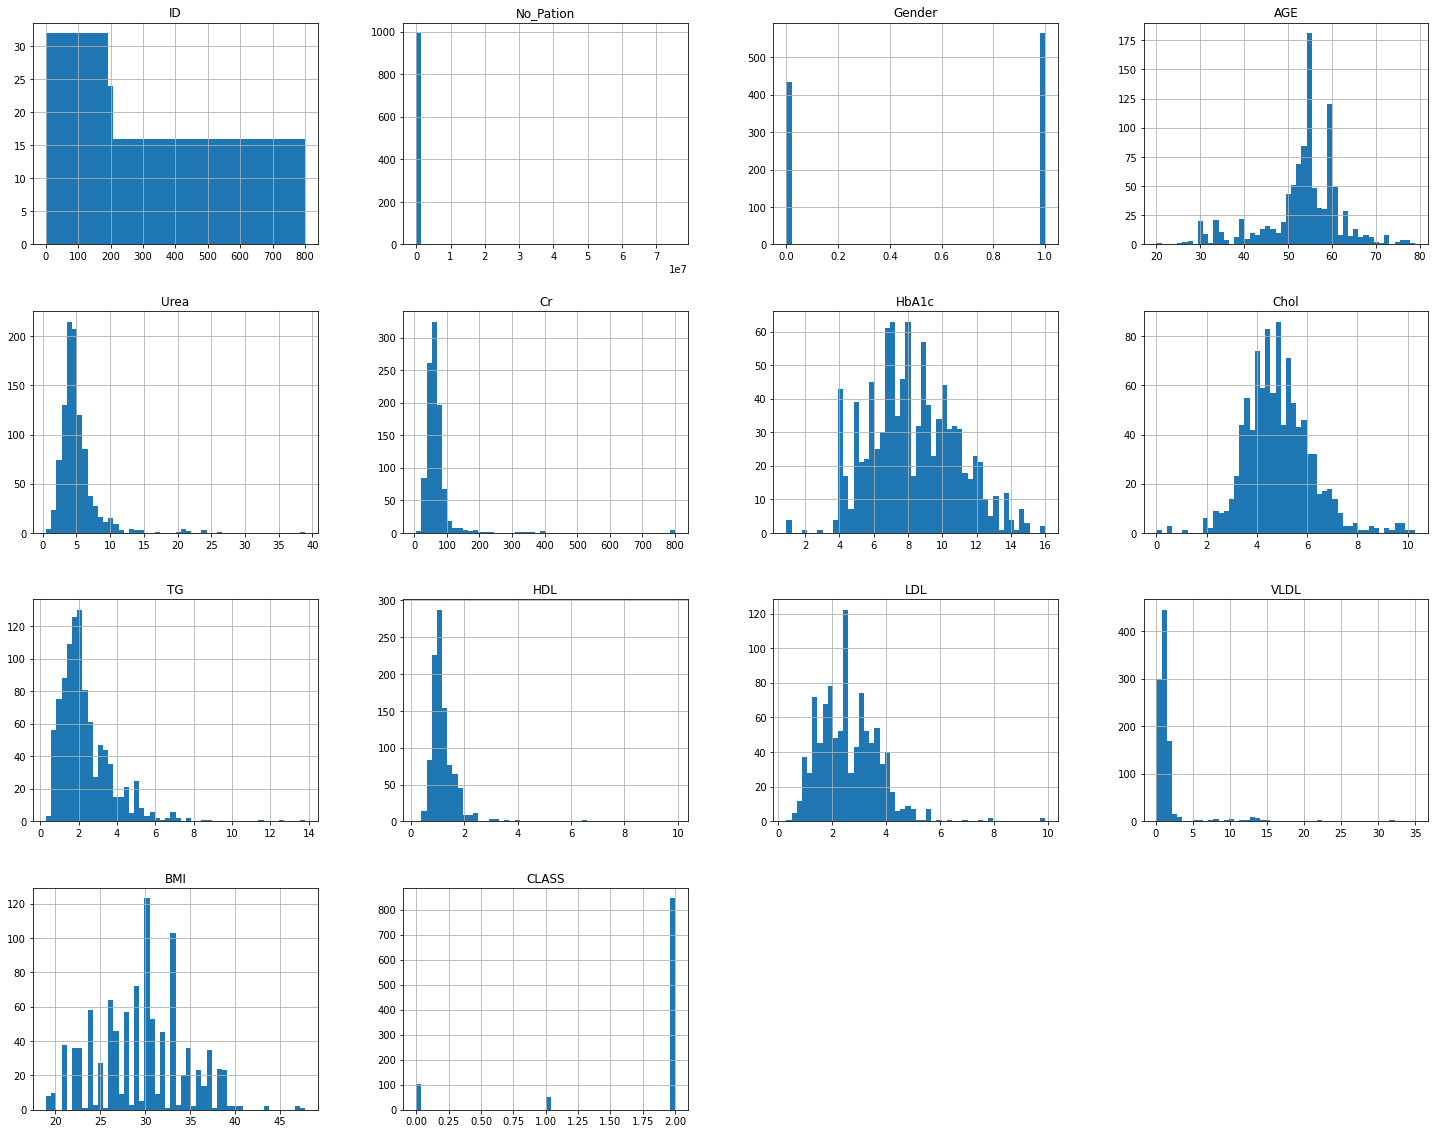

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [ ]:
model = abc.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

0.95875

In [ ]:
model.score(X_test, y_test)

0.955

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pred))

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


[[ 16   0   0]
 [  0   8   0]
 [  0   9 167]]


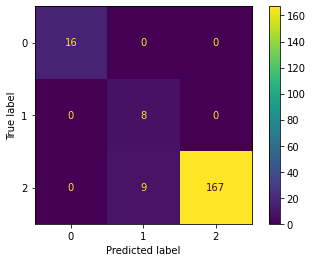

In [ ]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.47      1.00      0.64         8
           2       1.00      0.95      0.97       176

    accuracy                           0.95       200
   macro avg       0.82      0.98      0.87       200
weighted avg       0.98      0.95      0.96       200

